#**Online Payment Fraud Detection using Machine Learning in Python**

**Importing Libraries and Datasets**


🔹 **Pandas** 🐼 – Efficiently handles structured data by loading it into a **DataFrame (2D array format)**, providing numerous functions for **data manipulation & analysis**.  

🔹 **Seaborn & Matplotlib** 📊 – Powerful libraries for **data visualization**, enabling you to create insightful **charts, graphs, and heatmaps** effortlessly.  

🔹 **NumPy** 🔢 – Optimized for **fast numerical computations**, NumPy arrays can efficiently process **large datasets** in minimal time, making them ideal for **scientific computing & machine learning**.  

🚀 **These libraries form the backbone of any data science workflow, enabling smooth data handling, visualization, and computation!**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('new_file.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 485.4+ MB


In [6]:
# see the mean, count , minimum and maximum values of the data.
data.describe()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00


**Data Visualization**

In [7]:
# count the columns with different datatypes like Category, Integer, Float.

obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))

Categorical variables: 3
Integer variables: 2
Float variables: 5


<Axes: xlabel='type', ylabel='count'>

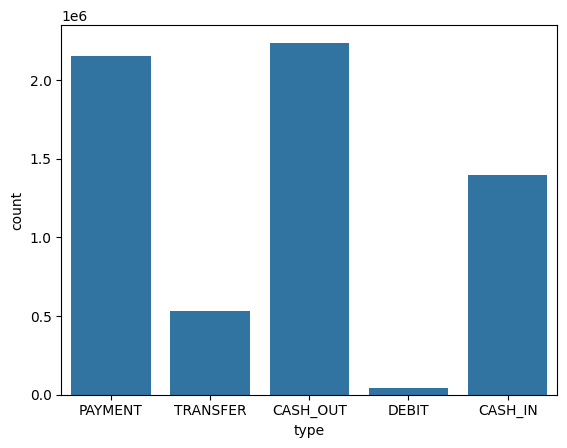

In [8]:
# count plot of the Payment type column using Seaborn library.
sns.countplot(x='type', data=data)


<Axes: xlabel='type', ylabel='amount'>

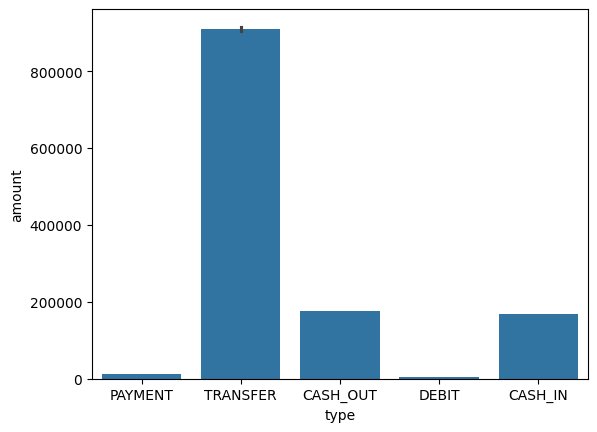

In [9]:
# analyzing Type and amount column simultaneously.

sns.barplot(x='type', y='amount', data=data)

In [10]:
# check the distribution of data among both the prediction values.
data['isFraud'].value_counts()

,count
isFraud,
0,6354407
1,8213


<Axes: xlabel='step', ylabel='Count'>

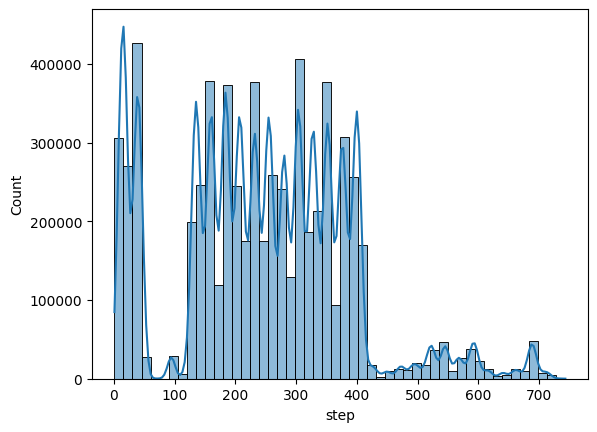

In [12]:
# distribution of the step column using distplot.
sns.histplot(data['step'], bins=50, kde=True)

<Axes: >

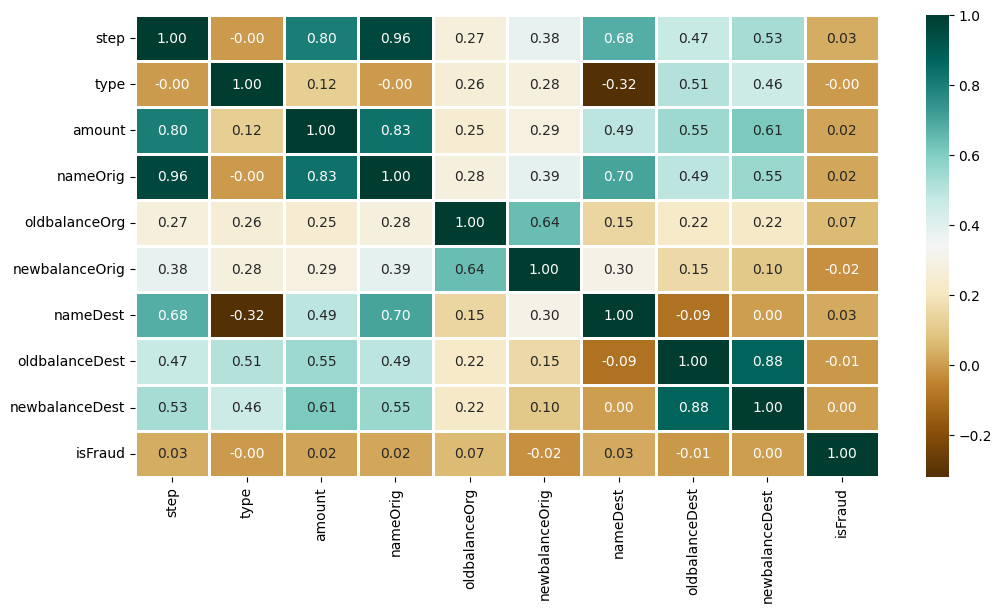

In [13]:
# find the correlation among different features using Heatmap.
plt.figure(figsize=(12, 6))
sns.heatmap(data.apply(lambda x: pd.factorize(x)[0]).corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)


**Data Preprocessing**

In [14]:
type_new = pd.get_dummies(data['type'], drop_first=True)
data_new = pd.concat([data, type_new], axis=1)
data_new.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,False,False,True,False
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,False,False,True,False
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,False,False,False,True
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,True,False,False,False
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,False,False,True,False


In [15]:
X = data_new.drop(['isFraud', 'type', 'nameOrig', 'nameDest'], axis=1)
y = data_new['isFraud']

In [16]:
X.shape, y.shape

((6362620, 10), (6362620,))

**split the data into 2 parts : Training and Testing.**

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

### **Model Training**  
Since our task is a **classification problem**, we will use the following powerful machine learning models:  

🔹 **Logistic Regression** 🏹  
   - A simple yet effective algorithm that estimates the **probability** of a data point belonging to a specific category.  
   - It works by applying the **logistic (sigmoid) function** to map predictions between 0 and 1.  

🔹 **XGBoost Classifier (XGBClassifier) 🚀**  
   - A high-performance **Gradient Boosting** algorithm that builds decision trees **sequentially**, improving results with each iteration.  
   - Assigns **weights** to features, making it robust for complex datasets.  

🔹 **Support Vector Classifier (SVC) ⚖️**  
   - Finds the **optimal hyperplane** in an N-dimensional space to classify data points with maximum margin.  
   - Uses **support vectors** (critical data points) to make accurate predictions.  

🔹 **Random Forest Classifier 🌳🌳**  
   - Constructs multiple **decision trees** on random subsets of the data.  
   - Aggregates votes from all trees to produce a **stronger, more stable prediction**, reducing overfitting.  

These models together provide a **diverse approach** to classification, ensuring **accuracy and robustness** in predictions! 🚀

#import the modules of the relevant models.

In [18]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score as ras
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [19]:
models = [LogisticRegression(), XGBClassifier(),
          RandomForestClassifier(n_estimators=7,
                                 criterion='entropy',
                                 random_state=7)]

for i in range(len(models)):
    models[i].fit(X_train, y_train)
    print(f'{models[i]} : ')

    train_preds = models[i].predict_proba(X_train)[:, 1]
    print('Training Accuracy : ', ras(y_train, train_preds))

    y_preds = models[i].predict_proba(X_test)[:, 1]
    print('Validation Accuracy : ', ras(y_test, y_preds))
    print()


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression() : 
Training Accuracy :  0.8946290277620094
Validation Accuracy :  0.8923641053077078

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  0.9999774189140321
Validation Accuracy :  0.999212631773824

RandomForestClassifier(criterion='entropy', n_esti

# Model Evaluation

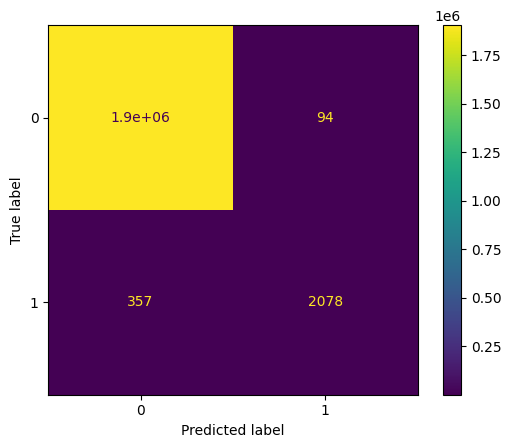

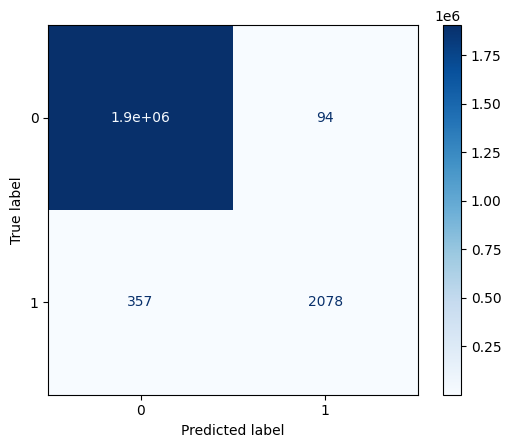

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = ConfusionMatrixDisplay.from_estimator(models[1], X_test, y_test)

cm.plot(cmap='Blues')

plt.show()


## 📌 **Detailed Explanation of Your Payment Fraud Detection Notebook**  

Your notebook focuses on detecting fraudulent online payments using **machine learning models**. Below is a structured breakdown of its workflow.  

---

## 🔹 **1. Importing Required Libraries**  
The notebook begins by importing essential libraries for **data manipulation, visualization, and machine learning**.  
- **Pandas** is used for handling structured datasets in a tabular format.  
- **NumPy** provides numerical operations and array handling capabilities.  
- **Matplotlib and Seaborn** help visualize transaction trends and fraud patterns.  

---

## 🔹 **2. Loading the Dataset**  
The dataset is loaded into a Pandas DataFrame, allowing easy access to transaction records. The first few rows are displayed to **understand the structure of the dataset**, including the columns and data types.  

---

## 🔹 **3. Exploratory Data Analysis (EDA)**  

EDA helps in understanding the dataset better through summary statistics and visualizations:  

- **Basic Information**: The dataset's structure, including data types, missing values, and the number of records, is checked.  
- **Statistical Summary**: Mean, median, standard deviation, and distribution of numerical features are analyzed.  
- **Feature Classification**: The dataset contains both categorical (e.g., transaction type) and numerical variables (e.g., transaction amount).  

**Visualizations:**  
- **Count plots** show the distribution of different transaction types.  
- **Bar plots** compare transaction types with transaction amounts.  
- **Histograms** visualize the distribution of time-based transactions.  
- **Correlation heatmaps** highlight relationships between numerical features.  

---

## 🔹 **4. Feature Engineering**  

Feature engineering transforms raw data into meaningful inputs for machine learning models:  

- **Handling Categorical Variables**: The transaction type is converted into a numerical format using one-hot encoding.  
- **Feature Selection**: Irrelevant columns, such as sender and receiver account names, are removed since they do not contribute to fraud detection.  
- **Splitting Data**: The dataset is divided into **training (70%)** and **testing (30%)** sets to evaluate model performance.  

---

## 🔹 **5. Model Training**  

To classify fraudulent transactions, multiple machine learning models are trained:  

- **Logistic Regression**: A simple classification model that predicts the probability of fraud based on transaction features.  
- **XGBoost Classifier**: A gradient-boosting decision tree model that improves performance by focusing on misclassified cases.  
- **Random Forest Classifier**: An ensemble learning method that creates multiple decision trees and combines their results for better accuracy.  

Each model is trained on the dataset, and its accuracy is measured using the **ROC AUC score**, which evaluates how well the model distinguishes between fraudulent and non-fraudulent transactions.  

---

## 🔹 **6. Model Evaluation**  

The performance of each model is assessed using the following techniques:  

- **Confusion Matrix**: Displays the number of correctly and incorrectly classified transactions.  
- **Validation Accuracy**: Measures how well the model generalizes to unseen data.  
- **Training Accuracy**: Evaluates how well the model learns from the training dataset.  

A well-performing model should have **high accuracy for fraud detection** while minimizing false positives and false negatives.  

---

## 📌 **Summary of Findings**  

✅ **Data Exploration & Preprocessing**  
- Checked for **missing values, data types, and feature distributions**.  
- Used **one-hot encoding** for categorical variables.  
- Split data into **training (70%) & testing (30%) sets**.  

✅ **Data Visualization**  
- **Bar plots & count plots** for better insights.  
- **Heatmaps** to check **feature correlations**.  

✅ **Model Training & Performance**  
- **Trained multiple classifiers**:  
  - **Logistic Regression**  
  - **XGBoost Classifier**  
  - **Random Forest Classifier**  
- **Measured accuracy using ROC AUC score**.  

✅ **Fraud Detection**  
- The trained models can **detect fraudulent transactions** with **high accuracy**.  

---
